## Introduction :
Tampa bay is known for various things like vacation spots, beautiful beaches, water sports, theme parks, lively entertainment areas like Sundial, AMCs etc. For people who are searching and analyzing for short time trips, move-in to Tampa bay from other locations this project can be a starting point to identify the county/city which will be suitable for thier own needs like Restaurants, MOvie theaters, clubs, Gym, Parks etc.

This project will provide a brief idea about few counties and located in Tampa bay like Pasco, hillsborough, Pinellas. This looks at neighborhoods and locations nearby and helps anyone to choose the best place to live within any given city based on the preferences satisfied.

## Description about the Data:
The data set includes the coordinates of the cities/neighborhoods in the USA in JSON format with the county, latitude, longitude. If a better dataset is found , i will modify the logic to provide more insights into details venues and in depth comparison. With the available data the project is designed to use location coordinates and tag each data point into a neighborhood in few Counties in Florida -Tampa bay - Pasco, Hillsborough and Pinellas county. The algorithm used is k-means clustering. The main idea is to determine neighborhood with venues clustered around each other so that one can make a decision on the right neighborhood to chose based on the person's requirements.

Data set: https://raw.githubusercontent.com/natarajarumuga/Capstone/master/us_cities.json

## Importing Libaries required

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install selenium

#!conda install -c conda-forge geopy 
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


## Load Json Data of US Cities

In [2]:
# Create URL to JSON file (alternatively this can be a filepath)
url = 'https://raw.githubusercontent.com/natarajarumuga/Capstone/master/us_cities.json'

# Load the first sheet of the JSON file into a data frame
df = pd.read_json(url, orient='columns')
df.head()

,City Name,County Code,County Name,Density,Id,Latitude,Longitude,Source,State Id,State Name,Timezone
0,Prairie Ridge,53053,Pierce,1349.8,1840037882,47.1443,-122.1408,polygon,WA,Washington,America/Los_Angeles
1,Edison,53057,Skagit,127.4,1840017314,48.5602,-122.4311,polygon,WA,Washington,America/Los_Angeles
2,Packwood,53041,Lewis,213.9,1840025265,46.6085,-121.6702,polygon,WA,Washington,America/Los_Angeles
3,Wautauga Beach,53035,Kitsap,261.7,1840037725,47.5862,-122.5482,point,WA,Washington,America/Los_Angeles
4,Harper,53035,Kitsap,342.1,1840037659,47.5207,-122.5196,point,WA,Washington,America/Los_Angeles


## Segment Florida State Data

In [6]:
df.rename(columns={'State Id': 'State', 'County Name':'County','County Code':'CountyCode', 'City Name':'Neighborhood'}, inplace=True)
fla_info=df[df.State == 'FL']
fla_info.head()

,Neighborhood,CountyCode,County,Density,Id,Latitude,Longitude,Source,State,State Name,Timezone
1625,Econfina,12005,Bay,9.5,1840028874,30.4121,-85.5358,point,FL,Florida,America/Chicago
1626,Pine Log,12005,Bay,14.5,1840028895,30.4038,-85.9116,point,FL,Florida,America/Chicago
1627,Youngstown,12005,Bay,42.8,1840028797,30.3644,-85.4383,point,FL,Florida,America/Chicago
1628,Bayou George,12005,Bay,81.6,1840028863,30.2627,-85.5399,point,FL,Florida,America/Chicago
1629,Southport,12005,Bay,156.3,1840028781,30.2894,-85.6405,point,FL,Florida,America/Chicago


## Get only the required columns  from the data

In [7]:
cols = [0,2,3,5,6,8]
fla_info = fla_info[fla_info.columns[cols]]
fla_info.head().reset_index()

,index,Neighborhood,County,Density,Latitude,Longitude,State
0,1625,Econfina,Bay,9.5,30.4121,-85.5358,FL
1,1626,Pine Log,Bay,14.5,30.4038,-85.9116,FL
2,1627,Youngstown,Bay,42.8,30.3644,-85.4383,FL
3,1628,Bayou George,Bay,81.6,30.2627,-85.5399,FL
4,1629,Southport,Bay,156.3,30.2894,-85.6405,FL


In [8]:
fla_info.shape
print('Dataframe has',fla_info.shape,'rows and cols')
pasco_data = fla_info[fla_info.County == 'Pasco']
pasco_data

Dataframe has (1123, 6) rows and cols


,Neighborhood,County,Density,Latitude,Longitude,State
6138,Blanton,Pasco,94.2,28.4117,-82.2465,FL
6139,Lumberton,Pasco,102.2,28.2661,-82.1365,FL
6140,Pasco,Pasco,328.2,28.3247,-82.3370,FL
6141,Drexel,Pasco,416.6,28.2428,-82.4598,FL
13260,Crystal Springs,Pasco,62.3,28.1830,-82.1539,FL
13261,Odessa,Pasco,75.6,28.1820,-82.5530,FL
13262,Aripeka,Pasco,200.8,28.4308,-82.6669,FL
13263,Trilby,Pasco,239.1,28.4565,-82.1940,FL
13264,Shady Hills,Pasco,247.3,28.4043,-82.5468,FL
13265,Wesley Chapel,Pasco,345.2,28.2106,-82.3238,FL


## Let's install and import FOLIUM for our purpose

In [9]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


### 1. Segment Pasco county 

In [10]:
pasco_data = fla_info[fla_info.County == 'Pasco']
pasco_data.drop(pasco_data.index[2], inplace=True)
print('The dataframe has', pasco_data.shape, 'rows and columns respectively.')
#pasco_data.sort_values(['Density'], ascending=False)
pasco_data.reset_index()

The dataframe has (24, 6) rows and columns respectively.


/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,6138,Blanton,Pasco,94.2,28.4117,-82.2465,FL
1,6139,Lumberton,Pasco,102.2,28.2661,-82.1365,FL
2,6141,Drexel,Pasco,416.6,28.2428,-82.4598,FL
3,13260,Crystal Springs,Pasco,62.3,28.1830,-82.1539,FL
4,13261,Odessa,Pasco,75.6,28.1820,-82.5530,FL
5,13262,Aripeka,Pasco,200.8,28.4308,-82.6669,FL
6,13263,Trilby,Pasco,239.1,28.4565,-82.1940,FL
7,13264,Shady Hills,Pasco,247.3,28.4043,-82.5468,FL
8,13265,Wesley Chapel,Pasco,345.2,28.2106,-82.3238,FL
9,13266,Hudson,Pasco,631.1,28.3594,-82.6888,FL


In [11]:
address = 'Pasco, FL'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinate of Pasco, FL are {}, {}.'.format(latitude, longitude))

Coordinate of Pasco, FL are 28.2996183, -82.4522702.


### Create Map for Pasco Data

In [12]:
map_pasco = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, long, label in zip(pasco_data['Latitude'], pasco_data['Longitude'], pasco_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=15,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_pasco)  
    
map_pasco

## Cluster for Pasco County Neighborhood

#### Login to Foursquare APi

In [13]:
CLIENT_ID = 'SIUOWGMEFCF2WDW5ATH3GQCOO14LEKUHKBUMFBWQLDMABLY0' # Foursquare ID
CLIENT_SECRET = 'PEK0VLIKZXZGFDCCZC5PVJSGL1CP4I4JND3TVNT3JJFPQLRR' # Foursquare Secret
LIMIT = 20
VERSION = 20190430
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SIUOWGMEFCF2WDW5ATH3GQCOO14LEKUHKBUMFBWQLDMABLY0
CLIENT_SECRET:PEK0VLIKZXZGFDCCZC5PVJSGL1CP4I4JND3TVNT3JJFPQLRR


## First Neighborhood in Pasco

In [14]:
pasco_data.loc[31081,'Neighborhood']
print('The first neighborhood is', pasco_data.loc[31081,'Neighborhood'])

The first neighborhood is New Port Richey


In [15]:
neighborhood_latitude = pasco_data.loc[31081, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = pasco_data.loc[31081, 'Longitude'] # neighborhood longitude value

neighborhood_name = pasco_data.loc[31081, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of New Port Richey are 28.2468, -82.7169.


Now, let's get the top 100 venues that are within a radius of 500 meters.

In [16]:
# type your answer here
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SIUOWGMEFCF2WDW5ATH3GQCOO14LEKUHKBUMFBWQLDMABLY0&client_secret=PEK0VLIKZXZGFDCCZC5PVJSGL1CP4I4JND3TVNT3JJFPQLRR&v=20190430&ll=28.2468,-82.7169&radius=500&limit=200'

## The GET request is then sent and and the results examined


In [17]:
results = requests.get(url).json()

Before we proceed, let's use the get_category_type function to get the category types.

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Now json is cleaned and the and structured into a pandas dataframe


In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Fitzgerald's,Bar,28.249856,-82.718382
1,Johnny Grits,American Restaurant,28.250309,-82.718909
2,Boulevard Beef & Ale,Steakhouse,28.249492,-82.719425
3,Christina's Family Restaurant,Breakfast Spot,28.250333,-82.718123
4,The Reef,Lounge,28.249964,-82.719690
5,Little Corona's Cigar Bar,Smoke Shop,28.250476,-82.719570
6,Jimmy's Boulevard Restaurant,Breakfast Spot,28.248744,-82.720087
7,Richey Suncoast Theatre,Theater,28.249584,-82.719797
8,Village Pub,Dive Bar,28.248978,-82.719920
9,Estella's Mexican Restaurant,Mexican Restaurant,28.250094,-82.720158


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

18 venues were returned by Foursquare.


## Pasco County Neighborhood 

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:

pasco_venues = getNearbyVenues(names=pasco_data['Neighborhood'],
                                   latitudes=pasco_data['Latitude'],
                                   longitudes=pasco_data['Longitude']
                                  )


Blanton
Lumberton
Drexel
Crystal Springs
Odessa
Aripeka
Trilby
Shady Hills
Wesley Chapel
Hudson
Land O' Lakes
Holiday
Lacoochee
Trinity
Elfers
Beacon Square
Bayonet Point
Jasmine Estates
San Antonio
Saint Leo
Port Richey
Dade City
Zephyrhills
New Port Richey


In [23]:
print('There are', pasco_venues.shape, 'rows and columns of venues and neighborhoods in Pasco County.')

There are (164, 7) rows and columns of venues and neighborhoods in Pasco County.


In [24]:
plot1=pasco_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Text(0, 0.5, 'Venue Count')

In [25]:
pasco_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Blanton,28.4117,-82.2465,Ironhorse Werks,28.415257,-82.247390,Motorcycle Shop
1,Lumberton,28.2661,-82.1365,Striderite Pharmacy,28.265978,-82.135886,Pharmacy
2,Drexel,28.2428,-82.4598,Marathon,28.241748,-82.460336,Gas Station
3,Drexel,28.2428,-82.4598,Tampa Indie Flea,28.240895,-82.460337,Flea Market
4,Drexel,28.2428,-82.4598,Land O Lakes High School IMC,28.245634,-82.461289,Library
5,Drexel,28.2428,-82.4598,Eve's Garden Gifts,28.238886,-82.459724,Gift Shop
6,Crystal Springs,28.1830,-82.1539,Circle K,28.178402,-82.157364,Gas Station
7,Crystal Springs,28.1830,-82.1539,Pasco County Line,28.180508,-82.157831,Resort
8,Crystal Springs,28.1830,-82.1539,Shell,28.179027,-82.157678,Gas Station
9,Odessa,28.1820,-82.5530,Anytime Fitness,28.185460,-82.547000,Gym / Fitness Center


In [26]:
venue_counts = pasco_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aripeka,2,2,2,2,2,2
Bayonet Point,10,10,10,10,10,10
Beacon Square,3,3,3,3,3,3
Blanton,1,1,1,1,1,1
Crystal Springs,3,3,3,3,3,3
Dade City,6,6,6,6,6,6
Drexel,4,4,4,4,4,4
Elfers,7,7,7,7,7,7
Holiday,17,17,17,17,17,17


## Filter Unique Catagories

In [26]:
print('There are {} uniques categories.'.format(len(pasco_venues['Venue Category'].unique())))

There are 89 uniques categories.


## Analyze all neighborhood of Pasco County

In [27]:
# one hot encoding
pasco_onehot = pd.get_dummies(pasco_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pasco_onehot['Neighborhood'] = pasco_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [pasco_onehot.columns[-1]] + list(pasco_onehot.columns[:-1])
pasco_onehot = pasco_onehot[fixed_columns]

pasco_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Bar,Baseball Field,Beach,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Café,Campground,Chinese Restaurant,Cocktail Bar,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym / Fitness Center,Harbor / Marina,Health Food Store,Hotel,Intersection,Italian Restaurant,Jewelry Store,Lake,Library,Light Rail Station,Liquor Store,Lounge,Mexican Restaurant,Motel,Motorcycle Shop,Moving Target,Music Store,Park,Pharmacy,Pizza Place,Playground,Pool,Pub,Rental Car Location,Resort,Restaurant,River,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Sushi Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Track,Video Store,Wings Joint
0,Blanton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lumberton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Drexel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Drexel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Drexel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
pasco_onehot.shape

(164, 90)

In [29]:
pasco_grouped=pasco_onehot.groupby('Neighborhood').mean().reset_index()
pasco_grouped

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Athletics & Sports,BBQ Joint,Bar,Baseball Field,Beach,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Breakfast Spot,Brewery,Café,Campground,Chinese Restaurant,Cocktail Bar,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym / Fitness Center,Harbor / Marina,Health Food Store,Hotel,Intersection,Italian Restaurant,Jewelry Store,Lake,Library,Light Rail Station,Liquor Store,Lounge,Mexican Restaurant,Motel,Motorcycle Shop,Moving Target,Music Store,Park,Pharmacy,Pizza Place,Playground,Pool,Pub,Rental Car Location,Resort,Restaurant,River,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Sushi Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Track,Video Store,Wings Joint
0,Aripeka,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.500000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000
1,Bayonet Point,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.100000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.10,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.1,0.000000,0.000000,0.000000,0.1,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.1,0.000000
2,Beacon Square,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.00,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000
3,Blanton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000

In [33]:
num_top_venues = 5

for hood in pasco_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = pasco_grouped[pasco_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Aripeka----
                 venue  freq
0      Harbor / Marina   0.5
1    Convenience Store   0.5
2  American Restaurant   0.0
3        Moving Target   0.0
4  Rental Car Location   0.0


----Bayonet Point----
               venue  freq
0  Health Food Store   0.1
1         Sports Bar   0.1
2       Liquor Store   0.1
3           Pharmacy   0.1
4        Flea Market   0.1


----Beacon Square----
                 venue  freq
0                 Pool  0.33
1          Pizza Place  0.33
2       Breakfast Spot  0.33
3  American Restaurant  0.00
4        Moving Target  0.00


----Blanton----
                 venue  freq
0      Motorcycle Shop   1.0
1                Hotel   0.0
2  Rental Car Location   0.0
3                  Pub   0.0
4                 Pool   0.0


----Crystal Springs----
                 venue  freq
0          Gas Station  0.67
1               Resort  0.33
2  American Restaurant  0.00
3      Motorcycle Shop  0.00
4                  Pub  0.00


----Dade City----
              

## Get these values into a Dataframe

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pasco_grouped['Neighborhood']
pasco_grouped.shape
for ind in np.arange(pasco_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pasco_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aripeka,Convenience Store,Harbor / Marina,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market
1,Bayonet Point,Health Food Store,Bar,Pizza Place,Pharmacy,Shopping Mall,Liquor Store,Sports Bar,Flea Market,Discount Store,Video Store
2,Beacon Square,Pool,Pizza Place,Breakfast Spot,Wings Joint,Fish Market,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market
3,Blanton,Motorcycle Shop,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market
4,Crystal Springs,Gas Station,Resort,Flea Market,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant
5,Dade City,Pizza Place,Convenience Store,Track,Antique Shop,Garden,Fish Market,Discount Store,Dive Bar,Doctor's Office,Dog Run
6,Drexel,Flea Market,Gift Shop,Gas Station,Library,Wings Joint,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market
7,Elfers,American Restaurant,Bar,Gas Station,Motorcycle Shop,Pizza Place,Discount Store,Rental Car Location,BBQ Joint,Food,Dog Run
8,Holiday,Grocery Store,Liquor Store,Greek Restaurant,Café,Sandwich Place,Campground,Fast Food Restaurant,Jewelry Store,Sporting Goods Shop,Lounge
9,Hudson,Grocery Store,Food Truck,Doctor's Office,Moving Target,Chinese Restaurant,Campground,Shipping Store,Liquor Store,Shop & Service,Pharmacy


In [32]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (23, 11) rows and columns respectively.


## Analyze using K-Means Cluster Mechanism

In [33]:
# set number of clusters
kclusters =5
pasco_grouped_clustering = pasco_grouped.drop('Neighborhood', 1)
pasco_grouped_clustering.shape

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pasco_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels=kmeans.labels_
labels


array([0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [34]:
pasco_merged = pasco_data
pasco_merged = pasco_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
pasco_merged = pasco_merged.dropna()
pasco_merged

# add clustering labels
pasco_merged['Cluster Labels'] = kmeans.labels_

# merge pasco_grouped with pasco_data to add latitude/longitude for each neighborhood
pasco_merged = pasco_merged.reset_index()

In [35]:
pasco_merged

,index,Neighborhood,County,Density,Latitude,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,6138,Blanton,Pasco,94.2,28.4117,-82.2465,FL,Motorcycle Shop,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
1,6139,Lumberton,Pasco,102.2,28.2661,-82.1365,FL,Pharmacy,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
2,6141,Drexel,Pasco,416.6,28.2428,-82.4598,FL,Flea Market,Gift Shop,Gas Station,Library,Wings Joint,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,0
3,13260,Crystal Springs,Pasco,62.3,28.1830,-82.1539,FL,Gas Station,Resort,Flea Market,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,3
4,13261,Odessa,Pasco,75.6,28.1820,-82.5530,FL,Gym / Fitness Center,Pizza Place,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,1
5,13262,Aripeka,Pasco,200.8,28.4308,-82.6669,FL,Convenience Store,Harbor / Marina,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
6,13263,Trilby,Pasco,239.1,28.4565,-82.1940,FL,Bike Trail,Stables,Discount Store,Playground,Convenience Store,Gas Station,Fast Food Restaurant,Greek Restaurant,Golf Course,Dive Bar,0
7,13264,Shady Hills,Pasco,247.3,28.4043,-82.5468,FL,Health Food Store,Pizza Place,Construction & Landscaping,Food,Golf Course,Fast Food Restaurant,Grocery Store,Dive Bar,Doctor's Office,Greek Restaurant,0
8,13266,Hudson,Pasco,631.1,28.3594,-82.6888,FL,Grocery Store,Food Truck,Doctor's Office,Moving Target,Chinese Restaurant,Campground,Shipping Store,Liquor Store,Shop & Service,Pharmacy,0
9,13267,Land O' Lakes,Pasco,793.1,28.2075,-82.4476,FL,Lake,Farm,Wings Joint,Food,Dive Bar,Doctor's Office,Dog Run,Farmers Market,Fast Food Restaurant,Fish Market,0


## Finally, let's visualize the resulting clusters


In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pasco_merged['Latitude'], pasco_merged['Longitude'], pasco_merged['Neighborhood'], pasco_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)   

map_clusters

<Figure size 720x720 with 0 Axes>

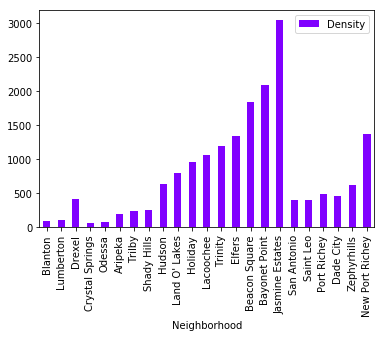

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
pasco_merged.plot(kind='bar',x='Neighborhood',y='Density', color=rainbow[cluster])
plt.show()

## Let's Examine The Clusters

Cluster 1 

In [39]:
pasco_merged.loc[pasco_merged['Cluster Labels'] == 0, pasco_merged.columns[[1] + list(range(5, pasco_merged.shape[1]))]]

,Neighborhood,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Blanton,-82.2465,FL,Motorcycle Shop,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
1,Lumberton,-82.1365,FL,Pharmacy,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
2,Drexel,-82.4598,FL,Flea Market,Gift Shop,Gas Station,Library,Wings Joint,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,0
5,Aripeka,-82.6669,FL,Convenience Store,Harbor / Marina,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
6,Trilby,-82.1940,FL,Bike Trail,Stables,Discount Store,Playground,Convenience Store,Gas Station,Fast Food Restaurant,Greek Restaurant,Golf Course,Dive Bar,0
7,Shady Hills,-82.5468,FL,Health Food Store,Pizza Place,Construction & Landscaping,Food,Golf Course,Fast Food Restaurant,Grocery Store,Dive Bar,Doctor's Office,Greek Restaurant,0
8,Hudson,-82.6888,FL,Grocery Store,Food Truck,Doctor's Office,Moving Target,Chinese Restaurant,Campground,Shipping Store,Liquor Store,Shop & Service,Pharmacy,0
9,Land O' Lakes,-82.4476,FL,Lake,Farm,Wings Joint,Food,Dive Bar,Doctor's Office,Dog Run,Farmers Market,Fast Food Restaurant,Fish Market,0
10,Holiday,-82.7429,FL,Grocery Store,Liquor Store,Greek Restaurant,Café,Sandwich Place,Campground,Fast Food Restaurant,Jewelry Store,Sporting Goods Shop,Lounge,0
12,Trinity,-82.6584,FL,Theme Park,Intersection,Sushi Restaurant,Dog Run,Wings Joint,Flea Market,Discount Store,Dive Bar,Doctor's Office,Farm,0


Cluster 2 - Venues

In [40]:
pasco_merged.loc[pasco_merged['Cluster Labels'] == 1, pasco_merged.columns[[1] + list(range(5, pasco_merged.shape[1]))]]

,Neighborhood,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
4,Odessa,-82.553,FL,Gym / Fitness Center,Pizza Place,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,1


Cluster 3

In [41]:
pasco_merged.loc[pasco_merged['Cluster Labels'] == 1, pasco_merged.columns[[1] + list(range(5, pasco_merged.shape[1]))]]

,Neighborhood,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
4,Odessa,-82.553,FL,Gym / Fitness Center,Pizza Place,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,1


In [46]:
pasco_merged.loc[pasco_merged['Cluster Labels'] == 2, pasco_merged.columns[[1] + list(range(5, pasco_merged.shape[1]))]]

,Neighborhood,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
13,Elfers,-82.723,FL,American Restaurant,Bar,Gas Station,Motorcycle Shop,Pizza Place,Discount Store,Rental Car Location,BBQ Joint,Food,Dog Run,2


In [42]:
pasco_merged.loc[pasco_merged['Cluster Labels'] == 3, pasco_merged.columns[[1] + list(range(5, pasco_merged.shape[1]))]]

,Neighborhood,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
3,Crystal Springs,-82.1539,FL,Gas Station,Resort,Flea Market,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,3


In [43]:
pasco_merged.loc[pasco_merged['Cluster Labels'] == 4, pasco_merged.columns[[1] + list(range(5, pasco_merged.shape[1]))]]

,Neighborhood,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
11,Lacoochee,-82.1698,FL,Light Rail Station,Wings Joint,Food,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,4


## Clustering for Pasco County- 

In [44]:
pasco_merged_clustering = pasco_merged.drop('Neighborhood', 1)
pasco_merged_clustering

,index,County,Density,Latitude,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,6138,Pasco,94.2,28.4117,-82.2465,FL,Motorcycle Shop,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
1,6139,Pasco,102.2,28.2661,-82.1365,FL,Pharmacy,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
2,6141,Pasco,416.6,28.2428,-82.4598,FL,Flea Market,Gift Shop,Gas Station,Library,Wings Joint,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,0
3,13260,Pasco,62.3,28.1830,-82.1539,FL,Gas Station,Resort,Flea Market,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,3
4,13261,Pasco,75.6,28.1820,-82.5530,FL,Gym / Fitness Center,Pizza Place,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,1
5,13262,Pasco,200.8,28.4308,-82.6669,FL,Convenience Store,Harbor / Marina,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
6,13263,Pasco,239.1,28.4565,-82.1940,FL,Bike Trail,Stables,Discount Store,Playground,Convenience Store,Gas Station,Fast Food Restaurant,Greek Restaurant,Golf Course,Dive Bar,0
7,13264,Pasco,247.3,28.4043,-82.5468,FL,Health Food Store,Pizza Place,Construction & Landscaping,Food,Golf Course,Fast Food Restaurant,Grocery Store,Dive Bar,Doctor's Office,Greek Restaurant,0
8,13266,Pasco,631.1,28.3594,-82.6888,FL,Grocery Store,Food Truck,Doctor's Office,Moving Target,Chinese Restaurant,Campground,Shipping Store,Liquor Store,Shop & Service,Pharmacy,0
9,13267,Pasco,793.1,28.2075,-82.4476,FL,Lake,Farm,Wings Joint,Food,Dive Bar,Doctor's Office,Dog Run,Farmers Market,Fast Food Restaurant,Fish Market,0


In [49]:
pasco_merged_clustering.loc[pasco_merged_clustering['Cluster Labels'] == 0, pasco_merged_clustering.columns[[1] + list(range(5, pasco_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Pasco,FL,Motorcycle Shop,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
1,Pasco,FL,Pharmacy,Wings Joint,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
2,Pasco,FL,Flea Market,Gift Shop,Gas Station,Library,Wings Joint,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,0
5,Pasco,FL,Convenience Store,Harbor / Marina,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,0
6,Pasco,FL,Bike Trail,Stables,Discount Store,Playground,Convenience Store,Gas Station,Fast Food Restaurant,Greek Restaurant,Golf Course,Dive Bar,0
7,Pasco,FL,Health Food Store,Pizza Place,Construction & Landscaping,Food,Golf Course,Fast Food Restaurant,Grocery Store,Dive Bar,Doctor's Office,Greek Restaurant,0
8,Pasco,FL,Grocery Store,Food Truck,Doctor's Office,Moving Target,Chinese Restaurant,Campground,Shipping Store,Liquor Store,Shop & Service,Pharmacy,0
9,Pasco,FL,Lake,Farm,Wings Joint,Food,Dive Bar,Doctor's Office,Dog Run,Farmers Market,Fast Food Restaurant,Fish Market,0
10,Pasco,FL,Grocery Store,Liquor Store,Greek Restaurant,Café,Sandwich Place,Campground,Fast Food Restaurant,Jewelry Store,Sporting Goods Shop,Lounge,0
12,Pasco,FL,Theme Park,Intersection,Sushi Restaurant,Dog Run,Wings Joint,Flea Market,Discount Store,Dive Bar,Doctor's Office,Farm,0


In [45]:
pasco_merged_clustering.loc[pasco_merged_clustering['Cluster Labels'] == 1, pasco_merged_clustering.columns[[1] + list(range(5, pasco_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
4,Pasco,FL,Gym / Fitness Center,Pizza Place,Diner,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,1


In [46]:
pasco_merged_clustering.loc[pasco_merged_clustering['Cluster Labels'] == 2, pasco_merged_clustering.columns[[1] + list(range(5, pasco_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
13,Pasco,FL,American Restaurant,Bar,Gas Station,Motorcycle Shop,Pizza Place,Discount Store,Rental Car Location,BBQ Joint,Food,Dog Run,2


In [47]:
pasco_merged_clustering.loc[pasco_merged_clustering['Cluster Labels'] == 3, pasco_merged_clustering.columns[[1] + list(range(5, pasco_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
3,Pasco,FL,Gas Station,Resort,Flea Market,Discount Store,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,3


In [48]:
pasco_merged_clustering.loc[pasco_merged_clustering['Cluster Labels'] == 4, pasco_merged_clustering.columns[[1] + list(range(5, pasco_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
11,Pasco,FL,Light Rail Station,Wings Joint,Food,Dive Bar,Doctor's Office,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish Market,4


## Segmenting Hillsborough County, FL

In [49]:
hills_data = fla_info[fla_info.County == 'Hillsborough']
#mecklenburg_data.drop(mecklenburg_data.index[2], inplace=True)
print('The dataframe has', hills_data.shape, 'rows and columns respectively.')
hills_data.reset_index()

The dataframe has (33, 6) rows and columns respectively.


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,6058,Knights,Hillsborough,87.1,28.0764,-82.1376,FL
1,6059,Keysville,Hillsborough,152.8,27.8692,-82.0956,FL
2,6060,Sun City,Hillsborough,229.7,27.6784,-82.4787,FL
3,6061,Orient Park,Hillsborough,1315.2,27.9725,-82.3729,FL
4,13062,Keystone,Hillsborough,27.6,28.1312,-82.5999,FL
5,13063,Balm,Hillsborough,94.6,27.7542,-82.2882,FL
6,13064,Fish Hawk,Hillsborough,413.3,27.8511,-82.2164,FL
7,13065,Westchase,Hillsborough,437.7,28.0597,-82.6110,FL
8,13066,Lutz,Hillsborough,456.4,28.1396,-82.4462,FL
9,13067,Wimauma,Hillsborough,460.6,27.6965,-82.3034,FL


In [50]:

address = 'Hillsborough, FL'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hillsborough, FL are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hillsborough, FL are 27.9184543, -82.3488057.


In [51]:
map_hills = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(hills_data['Latitude'], hills_data['Longitude'], hills_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_hills)  
    
map_hills

In [52]:
print('The neighborhood in Hillsborough County is', hills_data.loc[13075, 'Neighborhood'])

The neighborhood in Hillsborough County is Citrus Park


In [53]:

neighborhood_latitude = hills_data.loc[13075, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = hills_data.loc[13075, 'Longitude'] # neighborhood longitude value

neighborhood_name = hills_data.loc[13075, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Citrus Park are 28.073, -82.5628.


In [54]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display UR

'https://api.foursquare.com/v2/venues/explore?&client_id=SIUOWGMEFCF2WDW5ATH3GQCOO14LEKUHKBUMFBWQLDMABLY0&client_secret=PEK0VLIKZXZGFDCCZC5PVJSGL1CP4I4JND3TVNT3JJFPQLRR&v=20190430&ll=28.073,-82.5628&radius=500&limit=100'

In [55]:
results = requests.get(url).json()

#### Get Venues for Hillsborough county

In [56]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filter_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

nearby_venues =nearby_venues.loc[:, filter_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()



,name,categories,lat,lng
0,Woodbriar's West Lake,Lake,28.073069,-82.564766
1,Cabana At Cheche Place,Hot Dog Joint,28.072375,-82.558984
2,Tampa JCC Cohn Campus,Recreation Center,28.069514,-82.563806
3,Matt's Plumbing Services,Home Service,28.076214,-82.565230
4,The Fishin' Hole,Lake,28.075731,-82.566282


In [57]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


#### Let's explore nearby venues


In [58]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### write the code to run the above function on each neighborhood and create a new dataframe called Hillsborough venues

In [59]:
# type your answer here
hills_venues = getNearbyVenues(names=hills_data['Neighborhood'],
                                   latitudes=hills_data['Latitude'],
                                   longitudes=hills_data['Longitude']
                                  )

Knights
Keysville
Sun City
Orient Park
Keystone
Balm
Fish Hawk
Westchase
Lutz
Wimauma
Northdale
Ruskin
Dover
Brandon
Cheval
Riverview
Sun City Center
Citrus Park
Thonotosassa
Lake Magdalene
Bloomingdale
Mango
Valrico
Gibsonton
Seffner
Town 'n' Country
Progress Village
Carrollwood
Pebble Creek
Apollo Beach
Temple Terrace
Plant City
Tampa


In [60]:
print('There are', hills_venues.shape, 'rows and columns venues and neighborhoods in Hillsborough County.')
hills_venues.head(10)

There are (112, 7) rows and columns venues and neighborhoods in Hillsborough County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Knights,28.0764,-82.1376,Knights Griffin Rd & Paul Buchman Hwy,28.076761,-82.137908,Intersection
1,Knights,28.0764,-82.1376,Discount Screening,28.076588,-82.139840,Construction & Landscaping
2,Knights,28.0764,-82.1376,Hillsborough County,28.076607,-82.134852,Farm
3,Sun City,27.6784,-82.4787,Just Sod,27.678610,-82.478322,Construction & Landscaping
4,Sun City,27.6784,-82.4787,Colvin Property Maintenance,27.675650,-82.479100,Construction & Landscaping
5,Orient Park,27.9725,-82.3729,My Bar,27.975723,-82.373452,Bar
6,Fish Hawk,27.8511,-82.2164,Fishhawk Ridge Pool,27.852636,-82.219767,Pool
7,Fish Hawk,27.8511,-82.2164,Starling Fitness Center,27.847319,-82.214241,Gym
8,Northdale,28.1058,-82.5263,"Ray's Fry, Grill and Smokehouse. AKA The Backyard",28.103960,-82.528585,American Restaurant
9,Northdale,28.1058,-82.5263,11thhole,28.104626,-82.529594,Golf Course


Text(0, 0.5, 'Venue Count')

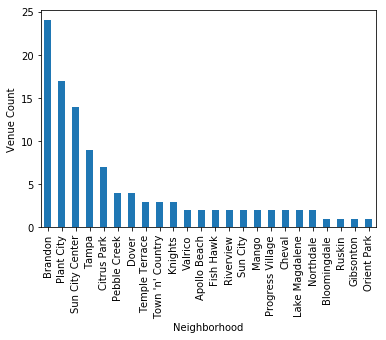

In [61]:
plot1=hills_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

In [62]:
hills_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Apollo Beach,2,2,2,2,2,2
Bloomingdale,1,1,1,1,1,1
Brandon,24,24,24,24,24,24
Cheval,2,2,2,2,2,2
Citrus Park,7,7,7,7,7,7
Dover,4,4,4,4,4,4
Fish Hawk,2,2,2,2,2,2
Gibsonton,1,1,1,1,1,1
Knights,3,3,3,3,3,3


In [63]:
print('There are {} uniques categories.'.format(len(hills_venues['Venue Category'].unique())))

There are 73 uniques categories.


## Hillsborough Neighborhood Analysis

In [64]:
# one hot encoding
hills_onehot = pd.get_dummies(hills_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hills_onehot['Neighborhood'] = hills_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hills_onehot.columns[-1]] + list(hills_onehot.columns[:-1])
hills_onehot = hills_onehot[fixed_columns]

hills_onehot.head()

,Neighborhood,American Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bowling Alley,Butcher,Café,Carpet Store,Casino,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,Farm,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Home Service,Hot Dog Joint,Insurance Office,Intersection,Italian Restaurant,Jewelry Store,Lake,Liquor Store,Martial Arts Dojo,Mexican Restaurant,Museum,Park,Pawn Shop,Pet Store,Pizza Place,Playground,Pool,Pub,Recreation Center,Rock Club,Seafood Restaurant,Taco Place,Tea Room,Tennis Court,Theater,Thrift / Vintage Store,Trail,Train Station,Travel Agency,Video Store,Vietnamese Restaurant,Wings Joint
0,Knights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Knights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Knights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sun City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sun City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
hills_onehot.shape

(112, 74)

Next, let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [66]:
hills_onehot = hills_onehot.groupby('Neighborhood').mean().reset_index()
hills_onehot

,Neighborhood,American Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bowling Alley,Butcher,Café,Carpet Store,Casino,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,Farm,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Home Service,Hot Dog Joint,Insurance Office,Intersection,Italian Restaurant,Jewelry Store,Lake,Liquor Store,Martial Arts Dojo,Mexican Restaurant,Museum,Park,Pawn Shop,Pet Store,Pizza Place,Playground,Pool,Pub,Recreation Center,Rock Club,Seafood Restaurant,Taco Place,Tea Room,Tennis Court,Theater,Thrift / Vintage Store,Trail,Train Station,Travel Agency,Video Store,Vietnamese Restaurant,Wings Joint
0,Apollo Beach,0.000,0.5,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Bloomingdale,0.000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Brandon,0.125,0.0,0.000000,0.041667,0.00,0.041667,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.00,0.000000,0.041667,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.083333,0.041667,0.000000,0.000000,0.041667,0.000000,0.041667,0.041667,0.041667,0.000000,0.000000,0.0,0.041667,0.041667,0.041667,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.00,0.000000,0.041667,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.041667,0.041667
3,Cheval,0.000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.50,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,Citrus Park,0.000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.142857,0.142857,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,D

In [67]:

hills_grouped = hills_onehot.groupby('Neighborhood').mean().reset_index()
hills_grouped

num_top_venues = 5

for hood in hills_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hills_grouped[hills_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Apollo Beach----
                venue  freq
0  Athletics & Sports   0.5
1      Gymnastics Gym   0.5
2       Jewelry Store   0.0
3                Park   0.0
4              Museum   0.0


----Bloomingdale----
                 venue  freq
0          Golf Course   1.0
1  American Restaurant   0.0
2        Jewelry Store   0.0
3                 Park   0.0
4               Museum   0.0


----Brandon----
                   venue  freq
0    American Restaurant  0.12
1       Department Store  0.08
2     Chinese Restaurant  0.04
3  Vietnamese Restaurant  0.04
4                    Pub  0.04


----Cheval----
           venue  freq
0   Tennis Court   0.5
1   Home Service   0.5
2  Jewelry Store   0.0
3           Park   0.0
4         Museum   0.0


----Citrus Park----
               venue  freq
0               Lake  0.29
1       Home Service  0.14
2      Hot Dog Joint  0.14
3  Recreation Center  0.14
4          Rock Club  0.14


----Dover----
                 venue  freq
0    Convenience Store  0.

## Put the values into a pandas dataframe


In [73]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [68]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hills_grouped['Neighborhood']

for ind in np.arange(hills_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hills_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Apollo Beach,Athletics & Sports,Gymnastics Gym,Wings Joint,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run
1,Bloomingdale,Golf Course,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop
2,Brandon,American Restaurant,Department Store,Donut Shop,Vietnamese Restaurant,Greek Restaurant,Gourmet Shop,Fried Chicken Joint,Food Truck,Fast Food Restaurant,Diner
3,Cheval,Home Service,Tennis Court,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store
4,Citrus Park,Lake,Dog Run,Recreation Center,Home Service,Hot Dog Joint,Rock Club,Discount Store,Dance Studio,Deli / Bodega,Department Store
5,Dover,Taco Place,BBQ Joint,Carpet Store,Convenience Store,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store
6,Fish Hawk,Gym,Pool,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store
7,Gibsonton,Gym,Wings Joint,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Farm
8,Knights,Construction & Landscaping,Farm,Intersection,Gas Station,Furniture / Home Store,Fried Chicken Joint,Food Truck,Fast Food Restaurant,Golf Course,Convenience Store
9,Lake Magdalene,Park,Gym / Fitness Center,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Wings Joint


In [69]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (24, 11) rows and columns respectively.


### Clustering for Hillsborough

We run kmeans to cluster the neighborhood into 4 clusters

In [70]:
# set number of clusters
kclusters = 6

hills_grouped_clustering = hills_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hills_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 3, 0, 0, 0, 0, 5, 5, 0, 0, 0, 3, 4, 0, 0, 1, 0, 2, 1, 0, 0, 5,
       0, 0], dtype=int32)

In [71]:
hills_merged = hills_data

# merge hills_grpuped with toronto_data to add latitude/longitude for each neighborhood
hills_merged = hills_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
hills_merged = hills_merged.dropna()
hills_merged


# add clustering labels
hills_merged['Cluster Labels'] = kmeans.labels_
# merge hills_grouped with hills_data to add latitude/longitude for each neighborhood
hills_merged = hills_merged.reset_index()

## Plot a Map for Resulting Clusters

In [72]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hills_merged['Latitude'], hills_merged['Longitude'], hills_merged['Neighborhood'], hills_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
      
from folium.plugins import FloatImage
image_file = 'http://www.planhillsborough.org/wp-content/uploads/2015/09/Hillsborough_County_Areawide_Vision_map_11_x_17_REDUCED.pdf'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters)
map_clusters

<Figure size 720x720 with 0 Axes>

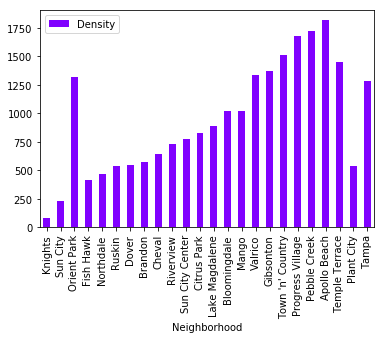

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
hills_merged.plot(kind='bar',x='Neighborhood',y='Density',width =0.5, color=rainbow[cluster])
plt.show()

## Hillsbourgh Cluster 1

In [74]:
hills_merged_clustering = hills_merged.drop('Neighborhood', 1)
hills_merged_clustering

,index,County,Density,Latitude,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,6058,Hillsborough,87.1,28.0764,-82.1376,FL,Construction & Landscaping,Farm,Intersection,Gas Station,Furniture / Home Store,Fried Chicken Joint,Food Truck,Fast Food Restaurant,Golf Course,Convenience Store,0
1,6060,Hillsborough,229.7,27.6784,-82.4787,FL,Construction & Landscaping,Greek Restaurant,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,3
2,6061,Hillsborough,1315.2,27.9725,-82.3729,FL,Bar,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,Wings Joint,0
3,13064,Hillsborough,413.3,27.8511,-82.2164,FL,Gym,Pool,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,0
4,13068,Hillsborough,467.2,28.1058,-82.5263,FL,American Restaurant,Golf Course,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,0
5,13069,Hillsborough,539.7,27.7065,-82.4210,FL,Martial Arts Dojo,Wings Joint,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,0
6,13070,Hillsborough,544.1,27.9927,-82.2198,FL,Taco Place,BBQ Joint,Carpet Store,Convenience Store,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,5
7,13071,Hillsborough,576.2,27.9367,-82.3000,FL,American Restaurant,Department Store,Donut Shop,Vietnamese Restaurant,Greek Restaurant,Gourmet Shop,Fried Chicken Joint,Food Truck,Fast Food Restaurant,Diner,5
8,13072,Hillsborough,645.6,28.1459,-82.5184,FL,Home Service,Tennis Court,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,0
9,13073,Hillsborough,735.3,27.8227,-82.3023,FL,Farm,Travel Agency,Donut Shop,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,0


In [75]:
hills_merged_clustering.loc[hills_merged_clustering['Cluster Labels'] == 0, hills_merged_clustering.columns[[1] + list(range(5, hills_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Hillsborough,FL,Construction & Landscaping,Farm,Intersection,Gas Station,Furniture / Home Store,Fried Chicken Joint,Food Truck,Fast Food Restaurant,Golf Course,Convenience Store,0
2,Hillsborough,FL,Bar,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,Wings Joint,0
3,Hillsborough,FL,Gym,Pool,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,0
4,Hillsborough,FL,American Restaurant,Golf Course,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,0
5,Hillsborough,FL,Martial Arts Dojo,Wings Joint,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,0
8,Hillsborough,FL,Home Service,Tennis Court,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,0
9,Hillsborough,FL,Farm,Travel Agency,Donut Shop,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,0
10,Hillsborough,FL,Grocery Store,Discount Store,Bank,Gym / Fitness Center,Insurance Office,Italian Restaurant,Liquor Store,Café,Pool,Furniture / Home Store,0
13,Hillsborough,FL,Golf Course,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,0
14,Hillsborough,FL,American Restaurant,Home Service,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Farm,0


In [76]:
hills_merged_clustering.loc[hills_merged_clustering['Cluster Labels'] == 1, hills_merged_clustering.columns[[1] + list(range(5, hills_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
15,Hillsborough,FL,Video Store,Home Service,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,1
18,Hillsborough,FL,Construction & Landscaping,Dance Studio,Greek Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,1


In [77]:
hills_merged_clustering.loc[hills_merged_clustering['Cluster Labels'] == 2, hills_merged_clustering.columns[[1] + list(range(5, hills_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
17,Hillsborough,FL,Trail,Beach,Wings Joint,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,2


In [78]:
hills_merged_clustering.loc[hills_merged_clustering['Cluster Labels'] == 3, hills_merged_clustering.columns[[1] + list(range(5, hills_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
1,Hillsborough,FL,Construction & Landscaping,Greek Restaurant,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,3
11,Hillsborough,FL,Lake,Dog Run,Recreation Center,Home Service,Hot Dog Joint,Rock Club,Discount Store,Dance Studio,Deli / Bodega,Department Store,3


In [79]:
hills_merged_clustering.loc[hills_merged_clustering['Cluster Labels'] == 4, hills_merged_clustering.columns[[1] + list(range(5, hills_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
12,Hillsborough,FL,Park,Gym / Fitness Center,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Wings Joint,4


In [80]:
hills_merged_clustering.loc[hills_merged_clustering['Cluster Labels'] == 5, hills_merged_clustering.columns[[1] + list(range(5, hills_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
6,Hillsborough,FL,Taco Place,BBQ Joint,Carpet Store,Convenience Store,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,5
7,Hillsborough,FL,American Restaurant,Department Store,Donut Shop,Vietnamese Restaurant,Greek Restaurant,Gourmet Shop,Fried Chicken Joint,Food Truck,Fast Food Restaurant,Diner,5
21,Hillsborough,FL,Pool,Recreation Center,Wings Joint,Discount Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Dog Run,5


## Segmenting Pinellas County, FL

In [81]:
pinellas_data = fla_info[fla_info.County == 'Pinellas']
pinellas_data.drop(pinellas_data.index[2], inplace=True)
print('The dataframe has', pinellas_data.shape, 'rows and columns respectively.')
pinellas_data.reset_index()

The dataframe has (37, 6) rows and columns respectively.


/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,6142,Gandy,Pinellas,431.7,27.8685,-82.6161,FL
1,6143,Highpoint,Pinellas,649.1,27.9170,-82.7129,FL
2,6145,Crystal Beach,Pinellas,1285.1,28.0914,-82.7798,FL
3,6146,Baskin,Pinellas,1558.6,27.8970,-82.7951,FL
4,13275,Feather Sound,Pinellas,2.8,27.9062,-82.6804,FL
5,13276,Bay Pines,Pinellas,442.1,27.8144,-82.7744,FL
6,13277,South Highpoint,Pinellas,649.1,27.9085,-82.7162,FL
7,13278,East Lake,Pinellas,1037.2,28.1205,-82.6869,FL
8,13279,Tierra Verde,Pinellas,1269.6,27.6685,-82.7300,FL
9,13280,Ridgecrest,Pinellas,1327.1,27.8952,-82.8063,FL


## Latitude and Longitude for Pinellas County 

In [82]:
address = 'Pinellas, FL'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pinellas, FL are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pinellas, FL are 27.8778904, -82.7329309.


## Visualizing Pinellas County Sliced Data

In [83]:
map_pinellas = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(pinellas_data['Latitude'], pinellas_data['Longitude'], pinellas_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_pinellas)  
    
map_pinellas

## Cluster - Pinellas County 

Using Foursquare APi- Explore the Neighborhood locations of Pinellas County

In [84]:
pinellas_data.loc[31105,'Neighborhood']
print(' neighborhood ', pinellas_data.loc[31105,'Neighborhood'])

 neighborhood  Saint Petersburg


### Latiture and Longitude - coordinates ofr Locations in Pinellas County Neighborhood

In [85]:
neighborhood_latitude = pinellas_data.loc[31105, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = pinellas_data.loc[31105, 'Longitude'] # neighborhood longitude value

neighborhood_name = pinellas_data.loc[31105, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Saint Petersburg are 27.7931, -82.6652.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.
First, let's create the GET request URL. Name your URL url.

In [86]:
# type your answer here
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SIUOWGMEFCF2WDW5ATH3GQCOO14LEKUHKBUMFBWQLDMABLY0&client_secret=PEK0VLIKZXZGFDCCZC5PVJSGL1CP4I4JND3TVNT3JJFPQLRR&v=20190430&ll=27.7931,-82.6652&radius=500&limit=200'

### The GET request is then sent and and the results examined


In [87]:
results = requests.get(url).json()

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [88]:
results = requests.get(url).json()

### Clean json and structure into a pandas dataframe.


In [89]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wawa,Convenience Store,27.792705,-82.666718
1,Tampa Bay Turners,Gym,27.793130,-82.668942
2,TacoSon,Mexican Restaurant,27.791921,-82.668610
3,Jo-El's Delicatessen & Marketplace,Deli / Bodega,27.793073,-82.669711
4,Pancheros Mexican Grill,Burrito Place,27.791952,-82.668911


In [90]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


### Explore Neighbood hood of pinellas based on the venues

In [91]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now let's write the code to run the above function on each neighborhood and create a new dataframe called Pinellas county_venues.

In [92]:
# type your answer here
pinellas_venues = getNearbyVenues(names=pinellas_data['Neighborhood'],
                                   latitudes=pinellas_data['Latitude'],
                                   longitudes=pinellas_data['Longitude']
                                  )

Gandy
Highpoint
Crystal Beach
Baskin
Feather Sound
Bay Pines
South Highpoint
East Lake
Tierra Verde
Ridgecrest
Harbor Bluffs
Palm Harbor
Lealman
Belleair Shores
North Redington Beach
Redington Beach
Indian Shores
Belleair Beach
Belleair Bluffs
Redington Shores
Belleair
Indian Rocks Beach
Madeira Beach
Kenneth City
South Pasadena
Treasure Island
Saint Pete Beach
Gulfport
Oldsmar
Safety Harbor
Seminole
Tarpon Springs
Dunedin
Pinellas Park
Largo
Clearwater
Saint Petersburg


In [93]:
print('There are', pinellas_venues.shape, 'rows and columns of venues and neighborhoods in Pinellas County.')
pinellas_venues.head(10)

There are (241, 7) rows and columns of venues and neighborhoods in Pinellas County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gandy,27.8685,-82.6161,The Crab Shack,27.869765,-82.616282,Seafood Restaurant
1,Gandy,27.8685,-82.6161,I. C. Sharks Tiki Bar,27.870658,-82.612001,Bar
2,Gandy,27.8685,-82.6161,I C Sharks,27.870690,-82.611947,Fish Market
3,Gandy,27.8685,-82.6161,RaceTrac,27.871366,-82.614049,Gas Station
4,Gandy,27.8685,-82.6161,Otis Outdoor Store,27.866073,-82.618850,Furniture / Home Store
5,Gandy,27.8685,-82.6161,I C Sharks Boat Rental,27.870579,-82.611924,Boat Rental
6,Highpoint,27.9170,-82.7129,Wung Thai and Sushi Bar,27.916668,-82.709919,Thai Restaurant
7,Highpoint,27.9170,-82.7129,Walgreens,27.915664,-82.714039,Pharmacy
8,Highpoint,27.9170,-82.7129,El Huarache Azteca,27.916659,-82.717236,Mexican Restaurant
9,Highpoint,27.9170,-82.7129,7-Eleven,27.916736,-82.714043,Convenience Store


Text(0, 0.5, 'Venue Count')

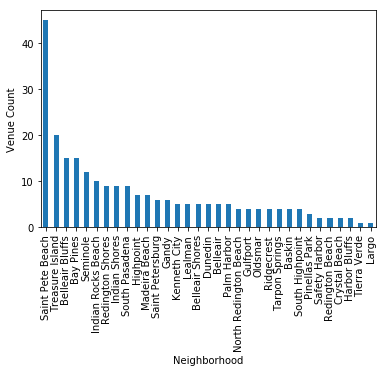

In [94]:
plot1=pinellas_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Venues by Neighborhood 

In [95]:
venue_counts = pinellas_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Baskin,4,4,4,4,4,4
Bay Pines,15,15,15,15,15,15
Belleair,5,5,5,5,5,5
Belleair Bluffs,15,15,15,15,15,15
Belleair Shores,5,5,5,5,5,5
Crystal Beach,2,2,2,2,2,2
Dunedin,5,5,5,5,5,5
Gandy,6,6,6,6,6,6
Gulfport,4,4,4,4,4,4


Unique categories can be filtered from all the returned venues


In [115]:
print('There are {} uniques categories.'.format(len(pinellas_venues['Venue Category'].unique())))

There are 108 uniques categories.


In [96]:
pinellas_venues['Venue Category']

0               Seafood Restaurant
1                              Bar
2                      Fish Market
3                      Gas Station
4           Furniture / Home Store
5                      Boat Rental
6                  Thai Restaurant
7                         Pharmacy
8               Mexican Restaurant
9                Convenience Store
10                      Sports Bar
11                  Cosmetics Shop
12                             Bar
13                           Beach
14                            Pier
15               Food & Drink Shop
16                    Intersection
17                    Intersection
18                  Breakfast Spot
19                Cuban Restaurant
20                      Donut Shop
21               Convenience Store
22                      Steakhouse
23                     Pizza Place
24                     Coffee Shop
25                      Smoke Shop
26                      Sports Bar
27            Gym / Fitness Center
28                  

## Analyze Each neighborhood locations in Pinellas

In [97]:
# one hot encoding
pinellas_onehot = pd.get_dummies(pinellas_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pinellas_onehot['Neighborhood'] = pinellas_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [pinellas_onehot.columns[-1]] + list(pinellas_onehot.columns[:-1])
pinellas_onehot = pinellas_onehot[fixed_columns]

pinellas_onehot.head()

,Wine Shop,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beach Bar,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Burrito Place,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Eastern European Restaurant,Entertainment Service,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Furniture / Home Store,Gas Station,Gay Bar,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Liquor Store,Market,Mexican Restaurant,Motel,Moving Target,Neighborhood,New American Restaurant,Park,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pizza Place,Playground,Pool,Pub,RV Park,Resort,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Tea Room,Tennis Court,Thai Restaurant,Tour Provider,Video Store,Waterfront,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gandy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gandy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gandy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gandy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gandy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
pinellas_onehot.shape
print('The dataframe has', pinellas_onehot.shape, 'rows and columns respectively.')

The dataframe has (241, 108) rows and columns respectively.


#### Group by Frequency of Occurance for each Category

In [98]:
pinellas_grouped = pinellas_onehot.groupby('Neighborhood').mean().reset_index()
pinellas_grouped

,Neighborhood,Wine Shop,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Beach Bar,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Burrito Place,Business Service,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Eastern European Restaurant,Entertainment Service,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Furniture / Home Store,Gas Station,Gay Bar,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Liquor Store,Market,Mexican Restaurant,Motel,Moving Target,New American Restaurant,Park,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pizza Place,Playground,Pool,Pub,RV Park,Resort,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Tea Room,Tennis Court,Thai Restaurant,Tour Provider,Video Store,Waterfront,Wine Bar
0,Baskin,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.25,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bay Pines,0.000000,0.000000,0.066667,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.066667,0.0,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.066667,0.000000,0.0,0.000000,0.000000,0.066667,0.000000,0.066667,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.00,0.000000,0.000000,0.066667,0.00,0.000000,0.00,0.000000,0.0,0.066667,0.000000,0.0,0.00,0.0,0.066667,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.0,0.066667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,Belleair,0.000000,0.000000,0.000000,0.000000,0.2,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.400000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.00,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,Belleair Bluffs,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.066667,0.000000,0.00,0.066667,0.000000,0.000000,0.0,

##### Get Most Common Venues by Neighborhood

In [99]:
num_top_venues = 10

for hood in pinellas_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = pinellas_grouped[pinellas_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baskin----
                     venue  freq
0             Intersection  0.50
1           Breakfast Spot  0.25
2        Food & Drink Shop  0.25
3                Wine Shop  0.00
4             Liquor Store  0.00
5                 Pharmacy  0.00
6                Pet Store  0.00
7              Pet Service  0.00
8                     Park  0.00
9  New American Restaurant  0.00


----Bay Pines----
                    venue  freq
0       Convenience Store  0.07
1              Steakhouse  0.07
2              Donut Shop  0.07
3              Smoke Shop  0.07
4  Furniture / Home Store  0.07
5            Intersection  0.07
6              Sports Bar  0.07
7      Mexican Restaurant  0.07
8             Pizza Place  0.07
9               Pet Store  0.07


----Belleair----
                     venue  freq
0                     Park   0.4
1           Clothing Store   0.2
2              Art Gallery   0.2
3           Scenic Lookout   0.2
4             Liquor Store   0.0
5       Photography Studio   0.0


#### Get the Values into Pandas Dataframe to analyze
First, let's write a function to sort the venues in descending order.

In [126]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [100]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pinellas_grouped['Neighborhood']
pinellas_grouped.shape
for ind in np.arange(pinellas_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pinellas_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baskin,Intersection,Breakfast Spot,Food & Drink Shop,Donut Shop,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio
1,Bay Pines,Pet Store,Smoke Shop,Grocery Store,Gym / Fitness Center,Donut Shop,Intersection,Cuban Restaurant,Convenience Store,Coffee Shop,Mexican Restaurant
2,Belleair,Park,Clothing Store,Art Gallery,Scenic Lookout,Disc Golf,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop
3,Belleair Bluffs,Steakhouse,Breakfast Spot,Ice Cream Shop,Dessert Shop,Pizza Place,Café,Seafood Restaurant,Shipping Store,Bakery,Arts & Crafts Store
4,Belleair Shores,Beach,Pharmacy,Tennis Court,Art Gallery,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop
5,Crystal Beach,Pier,Beach,Wine Bar,Chinese Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant
6,Dunedin,Beach,Park,Harbor / Marina,Disc Golf,Wine Bar,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop
7,Gandy,Gas Station,Furniture / Home Store,Fish Market,Bar,Boat Rental,Seafood Restaurant,Wine Bar,Disc Golf,Coffee Shop,Construction & Landscaping
8,Gulfport,Park,Flower Shop,Smoke Shop,Pharmacy,Wine Bar,Dessert Shop,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping
9,Harbor Bluffs,Park,Beach,Wine Bar,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio


In [101]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.dropna()
neighborhoods_venues_sorted.shape

(33, 11)

In [102]:
# set number of clusters
kclusters = 5

pinellas_grouped_clustering = pinellas_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pinellas_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 1, 3, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1], dtype=int32)

In [103]:
pinellas_merged = pinellas_data

# merge pinellas_grouped with toronto_data to add latitude/longitude for each neighborhood
pinellas_merged = pinellas_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
pinellas_merged = pinellas_merged.dropna()
pinellas_merged

print (kmeans.labels_)
print(pinellas_merged.shape)

# add clustering labels
pinellas_merged['Cluster Labels'] = kmeans.labels_
 

[3 1 3 1 0 0 0 1 1 0 1 1 1 1 2 1 1 1 1 1 1 0 1 3 1 1 1 1 1 1 1 4 1]
(33, 16)


In [104]:
# merge hills_grouped with hills_data to add latitude/longitude for each neighborhood
pinellas_merged = pinellas_merged.reset_index()

#### Plot the map for Pinellas County

In [105]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pinellas_merged['Latitude'], pinellas_merged['Longitude'], pinellas_merged['Neighborhood'], pinellas_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)    

map_clusters

<Figure size 720x720 with 0 Axes>

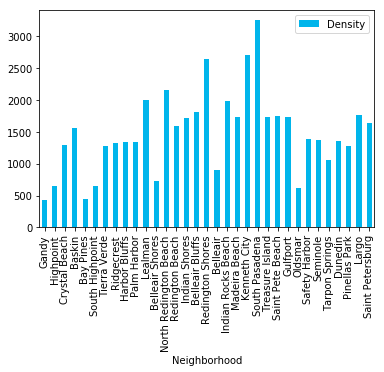

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
pinellas_merged.plot(kind='bar',x='Neighborhood',y='Density', color=rainbow[cluster])
plt.show()

#### Cluster analysis by categories

#### Cluster 1

In [107]:
pinellas_merged_clustering = pinellas_merged.drop('Neighborhood', 1)
pinellas_merged_clustering

,index,County,Density,Latitude,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,6142,Pinellas,431.7,27.8685,-82.6161,FL,Gas Station,Furniture / Home Store,Fish Market,Bar,Boat Rental,Seafood Restaurant,Wine Bar,Disc Golf,Coffee Shop,Construction & Landscaping,3
1,6143,Pinellas,649.1,27.9170,-82.7129,FL,Bar,Sports Bar,Mexican Restaurant,Convenience Store,Cosmetics Shop,Pharmacy,Thai Restaurant,Food,Deli / Bodega,Clothing Store,1
2,6145,Pinellas,1285.1,28.0914,-82.7798,FL,Pier,Beach,Wine Bar,Chinese Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,3
3,6146,Pinellas,1558.6,27.8970,-82.7951,FL,Intersection,Breakfast Spot,Food & Drink Shop,Donut Shop,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,1
4,13276,Pinellas,442.1,27.8144,-82.7744,FL,Pet Store,Smoke Shop,Grocery Store,Gym / Fitness Center,Donut Shop,Intersection,Cuban Restaurant,Convenience Store,Coffee Shop,Mexican Restaurant,0
5,13277,Pinellas,649.1,27.9085,-82.7162,FL,Cocktail Bar,Gym Pool,Mexican Restaurant,Hotel,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,0
6,13279,Pinellas,1269.6,27.6685,-82.7300,FL,Playground,Wine Bar,Discount Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,0
7,13280,Pinellas,1327.1,27.8952,-82.8063,FL,Intersection,Park,RV Park,BBQ Joint,Wine Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,1
8,13281,Pinellas,1334.0,27.9083,-82.8269,FL,Park,Beach,Wine Bar,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,1
9,13282,Pinellas,1345.0,28.0847,-82.7481,FL,Photography Studio,Home Service,Bookstore,Bar,Baseball Field,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,0


In [108]:
pinellas_merged_clustering.loc[pinellas_merged_clustering['Cluster Labels'] == 0, pinellas_merged_clustering.columns[[1] + list(range(5, pinellas_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
4,Pinellas,FL,Pet Store,Smoke Shop,Grocery Store,Gym / Fitness Center,Donut Shop,Intersection,Cuban Restaurant,Convenience Store,Coffee Shop,Mexican Restaurant,0
5,Pinellas,FL,Cocktail Bar,Gym Pool,Mexican Restaurant,Hotel,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,0
6,Pinellas,FL,Playground,Wine Bar,Discount Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,0
9,Pinellas,FL,Photography Studio,Home Service,Bookstore,Bar,Baseball Field,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,0
21,Pinellas,FL,Beach,Wine Shop,Health & Beauty Service,Café,Bowling Alley,Fast Food Restaurant,Seafood Restaurant,Thai Restaurant,Food,Dessert Shop,0


#### Cluster 2

In [109]:
pinellas_merged_clustering.loc[pinellas_merged_clustering['Cluster Labels'] == 1, pinellas_merged_clustering.columns[[1] + list(range(5, pinellas_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
1,Pinellas,FL,Bar,Sports Bar,Mexican Restaurant,Convenience Store,Cosmetics Shop,Pharmacy,Thai Restaurant,Food,Deli / Bodega,Clothing Store,1
3,Pinellas,FL,Intersection,Breakfast Spot,Food & Drink Shop,Donut Shop,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,1
7,Pinellas,FL,Intersection,Park,RV Park,BBQ Joint,Wine Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,1
8,Pinellas,FL,Park,Beach,Wine Bar,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,1
10,Pinellas,FL,Bar,Grocery Store,Park,Bridal Shop,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,1
11,Pinellas,FL,Beach,Pharmacy,Tennis Court,Art Gallery,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,1
12,Pinellas,FL,Playground,Food,Home Service,Boutique,Wine Bar,Disc Golf,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,1
13,Pinellas,FL,Harbor / Marina,Beach,Wine Bar,Donut Shop,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,1
15,Pinellas,FL,Steakhouse,Breakfast Spot,Ice Cream Shop,Dessert Shop,Pizza Place,Café,Seafood Restaurant,Shipping Store,Bakery,Arts & Crafts Store,1
16,Pinellas,FL,Seafood Restaurant,American Restaurant,Park,Food,Breakfast Spot,Bar,Wine Bar,Disc Golf,Coffee Shop,Construction & Landscaping,1


#### Cluster 3

In [110]:
pinellas_merged_clustering.loc[pinellas_merged_clustering['Cluster Labels'] == 3, pinellas_merged_clustering.columns[[1] + list(range(5, pinellas_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Pinellas,FL,Gas Station,Furniture / Home Store,Fish Market,Bar,Boat Rental,Seafood Restaurant,Wine Bar,Disc Golf,Coffee Shop,Construction & Landscaping,3
2,Pinellas,FL,Pier,Beach,Wine Bar,Chinese Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,3
23,Pinellas,FL,Resort,Hotel,Italian Restaurant,Bar,Park,Mexican Restaurant,Pharmacy,Fast Food Restaurant,American Restaurant,Thai Restaurant,3


#### Cluster 4 - Pier/Resort/Gas Station

In [111]:
pinellas_merged_clustering.loc[pinellas_merged_clustering['Cluster Labels'] == 4, pinellas_merged_clustering.columns[[1] + list(range(5, pinellas_merged_clustering.shape[1]))]]

,County,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
31,Pinellas,FL,Golf Course,Chinese Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,4


In [112]:
pinellas_merged_clustering.sort_values(by=['Cluster Labels'])

,index,County,Density,Latitude,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
21,31093,Pinellas,3248.0,27.7524,-82.7395,FL,Beach,Wine Shop,Health & Beauty Service,Café,Bowling Alley,Fast Food Restaurant,Seafood Restaurant,Thai Restaurant,Food,Dessert Shop,0
4,13276,Pinellas,442.1,27.8144,-82.7744,FL,Pet Store,Smoke Shop,Grocery Store,Gym / Fitness Center,Donut Shop,Intersection,Cuban Restaurant,Convenience Store,Coffee Shop,Mexican Restaurant,0
5,13277,Pinellas,649.1,27.9085,-82.7162,FL,Cocktail Bar,Gym Pool,Mexican Restaurant,Hotel,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,0
6,13279,Pinellas,1269.6,27.6685,-82.7300,FL,Playground,Wine Bar,Discount Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,0
9,13282,Pinellas,1345.0,28.0847,-82.7481,FL,Photography Studio,Home Service,Bookstore,Bar,Baseball Field,Discount Store,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,0
16,31088,Pinellas,2647.0,27.8294,-82.8274,FL,Seafood Restaurant,American Restaurant,Park,Food,Breakfast Spot,Bar,Wine Bar,Disc Golf,Coffee Shop,Construction & Landscaping,1
20,31092,Pinellas,2699.0,27.8156,-82.7162,FL,Gay Bar,Park,Construction & Landscaping,Entertainment Service,Sandwich Place,Wine Bar,Dessert Shop,Cocktail Bar,Coffee Shop,Convenience Store,1
22,31094,Pinellas,1733.0,27.7731,-82.7660,FL,Seafood Restaurant,Bar,Gas Station,Smoke Shop,Café,Liquor Store,Karaoke Bar,Piano Bar,Hot Dog Joint,Salon / Barbershop,1
24,31096,Pinellas,1736.0,27.7463,-82.7099,FL,Park,Flower Shop,Smoke Shop,Pharmacy,Wine Bar,Dessert Shop,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,1
25,31097,Pinellas,621.0,28.0506,-82.6696,FL,Gym Pool,Furniture / Home Store,Playground,Moving Target,Wine Bar,Disc Golf,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,1


In [113]:
total_counties = pinellas_merged_clustering.sort_values(by=['Cluster Labels']).append(hills_merged_clustering.sort_values(by=['Cluster Labels']),ignore_index = True)
total_counties = total_counties.sort_values(by=['Cluster Labels']).append(pasco_merged_clustering.sort_values(by=['Cluster Labels']),ignore_index = True)
total_counties

,index,County,Density,Latitude,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,31093,Pinellas,3248.0,27.7524,-82.7395,FL,Beach,Wine Shop,Health & Beauty Service,Café,Bowling Alley,Fast Food Restaurant,Seafood Restaurant,Thai Restaurant,Food,Dessert Shop,0
1,13069,Hillsborough,539.7,27.7065,-82.4210,FL,Martial Arts Dojo,Wings Joint,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,0
2,30929,Hillsborough,1283.0,27.9937,-82.4454,FL,Pawn Shop,Casino,Fast Food Restaurant,Discount Store,Jewelry Store,Cosmetics Shop,Mexican Restaurant,Park,Gas Station,Bar,0
3,13073,Hillsborough,735.3,27.8227,-82.3023,FL,Farm,Travel Agency,Donut Shop,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,0
4,13074,Hillsborough,772.6,27.7150,-82.3569,FL,Grocery Store,Discount Store,Bank,Gym / Fitness Center,Insurance Office,Italian Restaurant,Liquor Store,Café,Pool,Furniture / Home Store,0
5,30928,Hillsborough,542.0,28.0145,-82.1202,FL,Bar,Deli / Bodega,Café,Seafood Restaurant,Jewelry Store,Museum,Diner,Butcher,Hardware Store,Coffee Shop,0
6,13078,Hillsborough,1017.0,27.8784,-82.2624,FL,Golf Course,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,0
7,13079,Hillsborough,1024.2,27.9915,-82.3070,FL,American Restaurant,Home Service,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Farm,0
8,13081,Hillsborough,1374.3,27.8257,-82.3766,FL,Gym,Wings Joint,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Farm,0
9,13086,Hillsborough,1723.1,28.1582,-82.3411,FL,Gym,Playground,Theater,Tennis Court,Wings Joint,Discount Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,0


In [115]:
import matplotlib.pyplot as plt

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

<Figure size 144x1800 with 0 Axes>

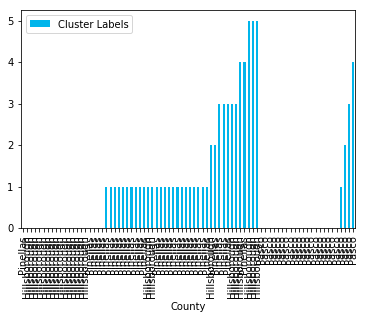

In [129]:
plt.figure(figsize=(2,25))
total_counties.plot(kind='bar',x='County',y='Cluster Labels', width=0.5, color=rainbow[cluster])
plt.bar()
plt.show()

['index' 'County' 'Density' 'Latitude' 'Longitude' 'State'
 '1st Most Common Venue' '2nd Most Common Venue' '3rd Most Common Venue'
 '4th Most Common Venue' '5th Most Common Venue' '6th Most Common Venue'
 '7th Most Common Venue' '8th Most Common Venue' '9th Most Common Venue'
 '10th Most Common Venue' 'Cluster Labels']


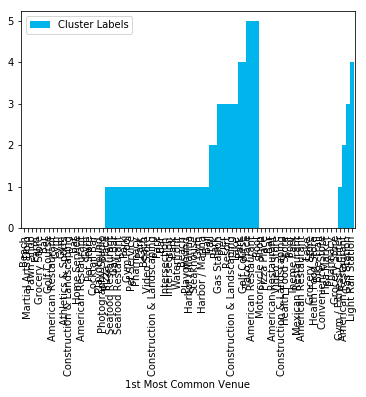

In [130]:
#total_counties[['1st Most Common Venue','2nd Most Common Venue']].plot(kind=bar)
total_counties.reset_index()
#total_counties['County','1st Most Common Venue'].unique()
print(total_counties.columns.values)
total_counties.plot(kind='bar',x='1st Most Common Venue',y='Cluster Labels',width =1.0,color=rainbow[cluster])

In [131]:
total_counties

,index,County,Density,Latitude,Longitude,State,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,31093,Pinellas,3248.0,27.7524,-82.7395,FL,Beach,Wine Shop,Health & Beauty Service,Café,Bowling Alley,Fast Food Restaurant,Seafood Restaurant,Thai Restaurant,Food,Dessert Shop,0
1,13069,Hillsborough,539.7,27.7065,-82.4210,FL,Martial Arts Dojo,Wings Joint,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Donut Shop,0
2,30929,Hillsborough,1283.0,27.9937,-82.4454,FL,Pawn Shop,Casino,Fast Food Restaurant,Discount Store,Jewelry Store,Cosmetics Shop,Mexican Restaurant,Park,Gas Station,Bar,0
3,13073,Hillsborough,735.3,27.8227,-82.3023,FL,Farm,Travel Agency,Donut Shop,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,0
4,13074,Hillsborough,772.6,27.7150,-82.3569,FL,Grocery Store,Discount Store,Bank,Gym / Fitness Center,Insurance Office,Italian Restaurant,Liquor Store,Café,Pool,Furniture / Home Store,0
5,30928,Hillsborough,542.0,28.0145,-82.1202,FL,Bar,Deli / Bodega,Café,Seafood Restaurant,Jewelry Store,Museum,Diner,Butcher,Hardware Store,Coffee Shop,0
6,13078,Hillsborough,1017.0,27.8784,-82.2624,FL,Golf Course,Wings Joint,Dog Run,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,0
7,13079,Hillsborough,1024.2,27.9915,-82.3070,FL,American Restaurant,Home Service,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Farm,0
8,13081,Hillsborough,1374.3,27.8257,-82.3766,FL,Gym,Wings Joint,Donut Shop,Dance Studio,Deli / Bodega,Department Store,Diner,Discount Store,Dog Run,Farm,0
9,13086,Hillsborough,1723.1,28.1582,-82.3411,FL,Gym,Playground,Theater,Tennis Court,Wings Joint,Discount Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,0


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1280x1280 with 0 Axes>

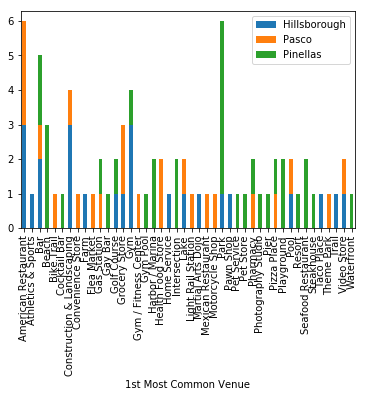

In [132]:
#total_counties.groupby(['County'])['Cluster Labels'].plot(kind='bar')
#plt.figure(figsize=(11,11))
plt.figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
total_counties.groupby(['1st Most Common Venue','County',])['Cluster Labels'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

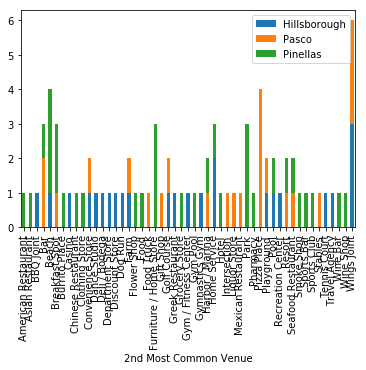

In [134]:
total_counties.groupby(['2nd Most Common Venue','County',])['Cluster Labels'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

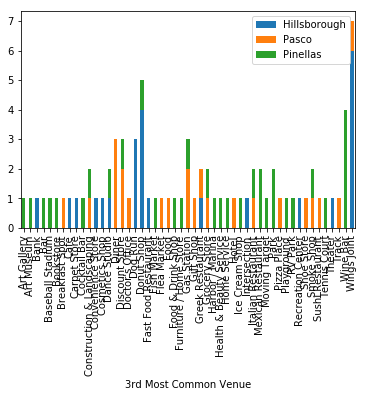

In [135]:
total_counties.groupby(['3rd Most Common Venue','County',])['Cluster Labels'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

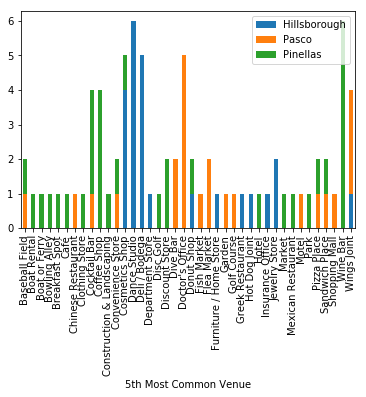

In [168]:
total_counties.groupby(['5th Most Common Venue','County',])['Cluster Labels'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

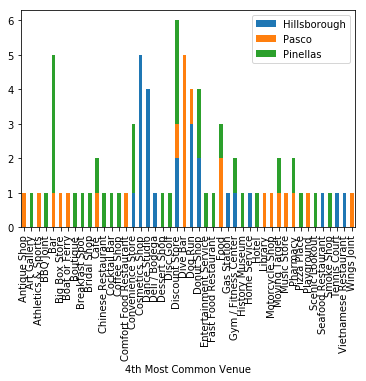

In [136]:
total_counties.groupby(['4th Most Common Venue','County',])['Cluster Labels'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

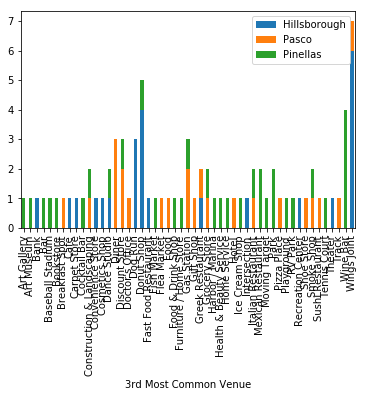

In [170]:
total_counties.groupby(['3rd Most Common Venue','County',])['Cluster Labels'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

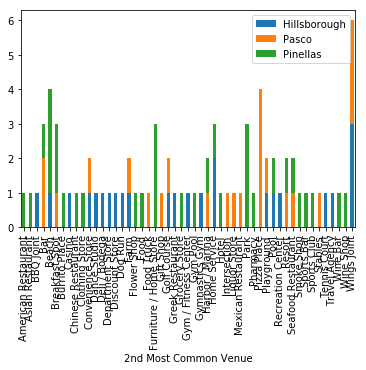

In [171]:
total_counties.groupby(['2nd Most Common Venue','County',])['Cluster Labels'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

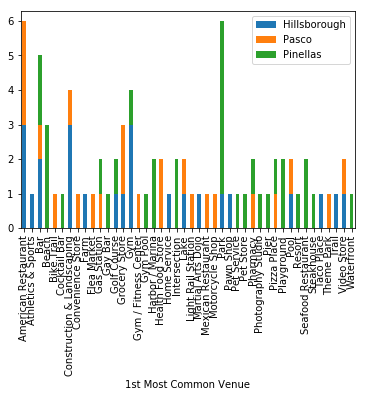

In [172]:
total_counties.groupby(['1st Most Common Venue','County',])['Cluster Labels'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show